# PREDICTING HOTEL RESERVATION CANCELLATION


## Introduction

### Hotel reservation cancellations are a major challenge in the hospitality industry, leading to significant revenue loss, resource wastage, and operational inefficiencies. Predicting cancellations in advance enables hotels to take proactive measures such as dynamic pricing, targeted promotions, or overbooking strategies to minimize the negative impact.This project, Predicting Hotel Reservation Cancellations, leverages data analytics and machine learning techniques to identify patterns and key factors influencing booking cancellations. By building and evaluating robust predictive models, the project aims to assist hotel management in making informed decisions, improving resource allocation, and enhancing overall customer satisfaction.

### Hotel booking cancellations can cause revenue loss and resource mismanagement. 
### Predicting cancellations in advance allows for dynamic pricing and overbooking strategies.
 ### Aims to improve operational efficiency and customer satisfaction.

### THE WORK FLOW OF THE PROJECT IS GIVEN BELOW :

### Project Goal

## Data Loading 

In [282]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [283]:
df = pd.read_csv('Hotel Reservations.csv')

In [284]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [285]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


## Data Cleaning

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [287]:
df.shape

(36275, 19)

In [288]:
df.isna().sum()        # Check null values in coulmns

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [289]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [290]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [291]:
df['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [292]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [293]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [294]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [295]:
avg_price_perroom = df['avg_price_per_room'].mean()

In [296]:
avg_price_perroom 

np.float64(103.42353907649897)

In [297]:
# Step 1: Rename columns for compatibility
df_renamed = df[['arrival_year', 'arrival_month', 'arrival_date']].rename(columns={
    'arrival_year': 'year',
    'arrival_month': 'month',
    'arrival_date': 'day'
})

# Step 2: Convert to datetime with error handlings
df['arrival_date'] = pd.to_datetime(df_renamed, errors='coerce')

# Step 3: (Optional) Find rows with invalid dates
invalid_dates = df[df['arrival_date'].isna()]
print("Invalid date rows:", invalid_dates)



Invalid date rows:       Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
2626    INN02627             2               0                     1   
3677    INN03678             1               0                     1   
5600    INN05601             2               0                     1   
6343    INN06344             1               0                     1   
7648    INN07649             2               1                     1   
8000    INN08001             2               2                     1   
8989    INN08990             1               0                     1   
9153    INN09154             2               2                     1   
9245    INN09246             2               0                     1   
9664    INN09665             1               0                     1   
9934    INN09935             1               0                     1   
10593   INN10594             2               0                     1   
10652   INN10653             2               

In [298]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2017-10-02,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,2018-11-06,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,2018-02-28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,2018-05-20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,2018-04-11,Online,0,0,0,94.50,0,Canceled


In [299]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

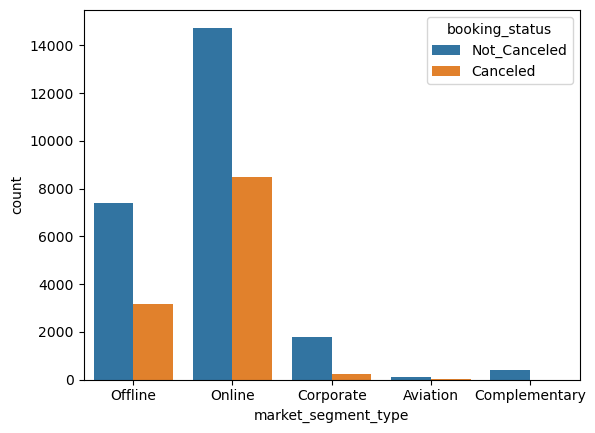

In [300]:
sns.countplot(x=df['market_segment_type'], hue=df['booking_status'])
plt.show()

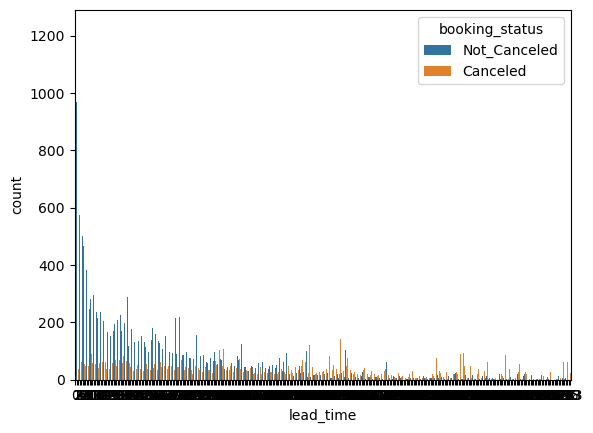

In [301]:
sns.countplot(x=df['lead_time'], hue=df['booking_status'])
plt.show()

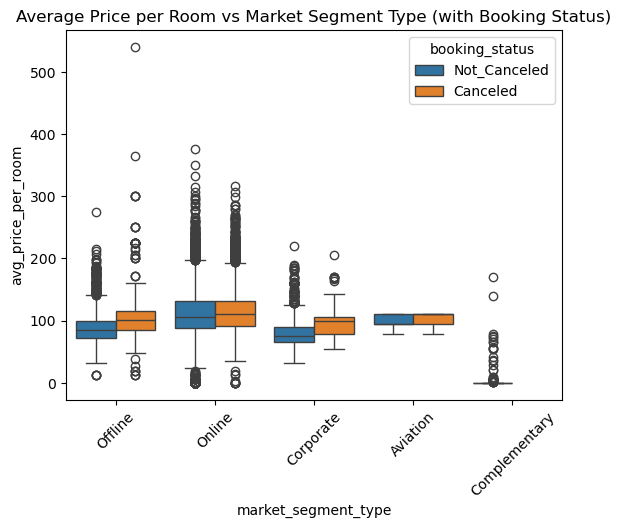

In [302]:
sns.boxplot(x='market_segment_type', y='avg_price_per_room', hue='booking_status', data=df)
plt.xticks(rotation=45)
plt.title("Average Price per Room vs Market Segment Type (with Booking Status)")
plt.show()


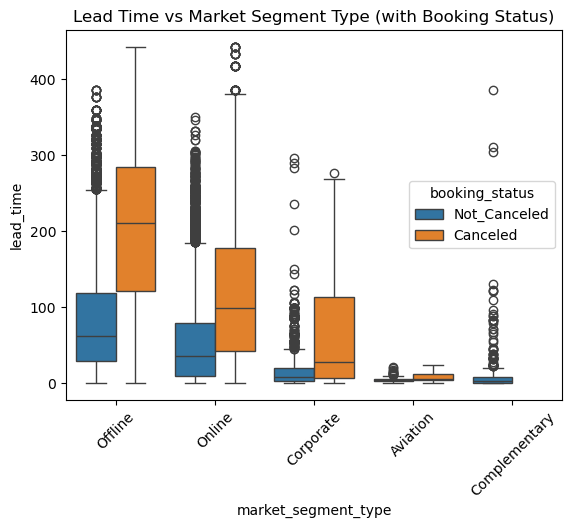

In [303]:
sns.boxplot(x='market_segment_type', y='lead_time', hue='booking_status', data=df)
plt.xticks(rotation=45)  # X-axis labels को घुमाना (optional)
plt.title("Lead Time vs Market Segment Type (with Booking Status)")
plt.show()


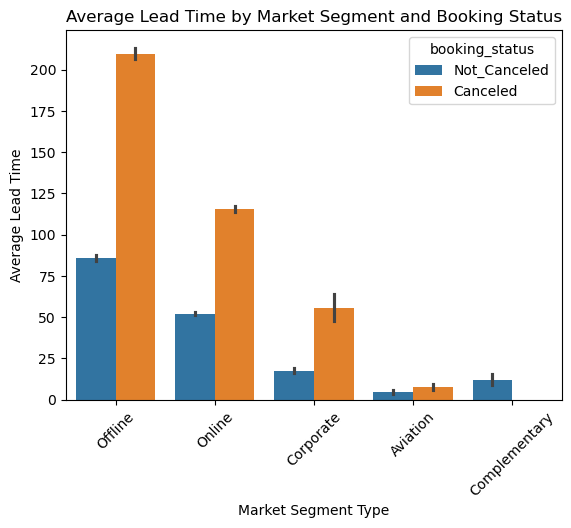

In [304]:
sns.barplot(x='market_segment_type', y='lead_time', hue='booking_status', data=df, estimator='mean')
plt.xticks(rotation=45)
plt.title("Average Lead Time by Market Segment and Booking Status")
plt.ylabel("Average Lead Time")
plt.xlabel("Market Segment Type")
plt.show()


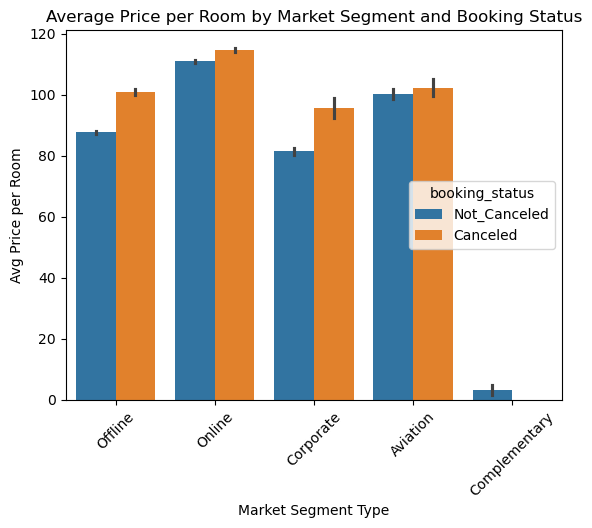

In [305]:
sns.barplot(x='market_segment_type', y='avg_price_per_room', hue='booking_status', data=df, estimator='mean')
plt.xticks(rotation=45)
plt.title("Average Price per Room by Market Segment and Booking Status")
plt.ylabel("Avg Price per Room")
plt.xlabel("Market Segment Type")
plt.show()


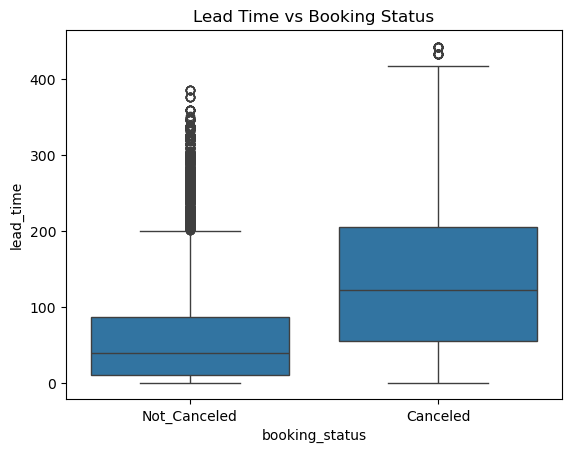

In [306]:
sns.boxplot(x='booking_status', y='lead_time', data=df)
plt.title("Lead Time vs Booking Status")
plt.show()


In [307]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2017-10-02,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,2018-11-06,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,2018-02-28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,2018-05-20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,2018-04-11,Online,0,0,0,94.50,0,Canceled


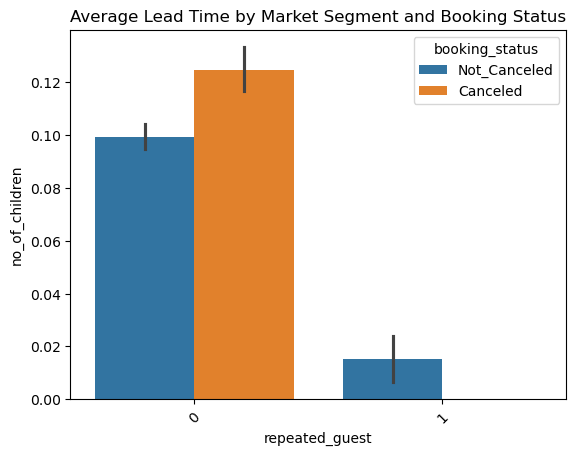

In [308]:
sns.barplot(x='repeated_guest', y='no_of_children', hue='booking_status', data=df, estimator='mean')
plt.xticks(rotation=45)
plt.title("Average Lead Time by Market Segment and Booking Status")
plt.ylabel("no_of_children")
plt.xlabel("repeated_guest")
plt.show()

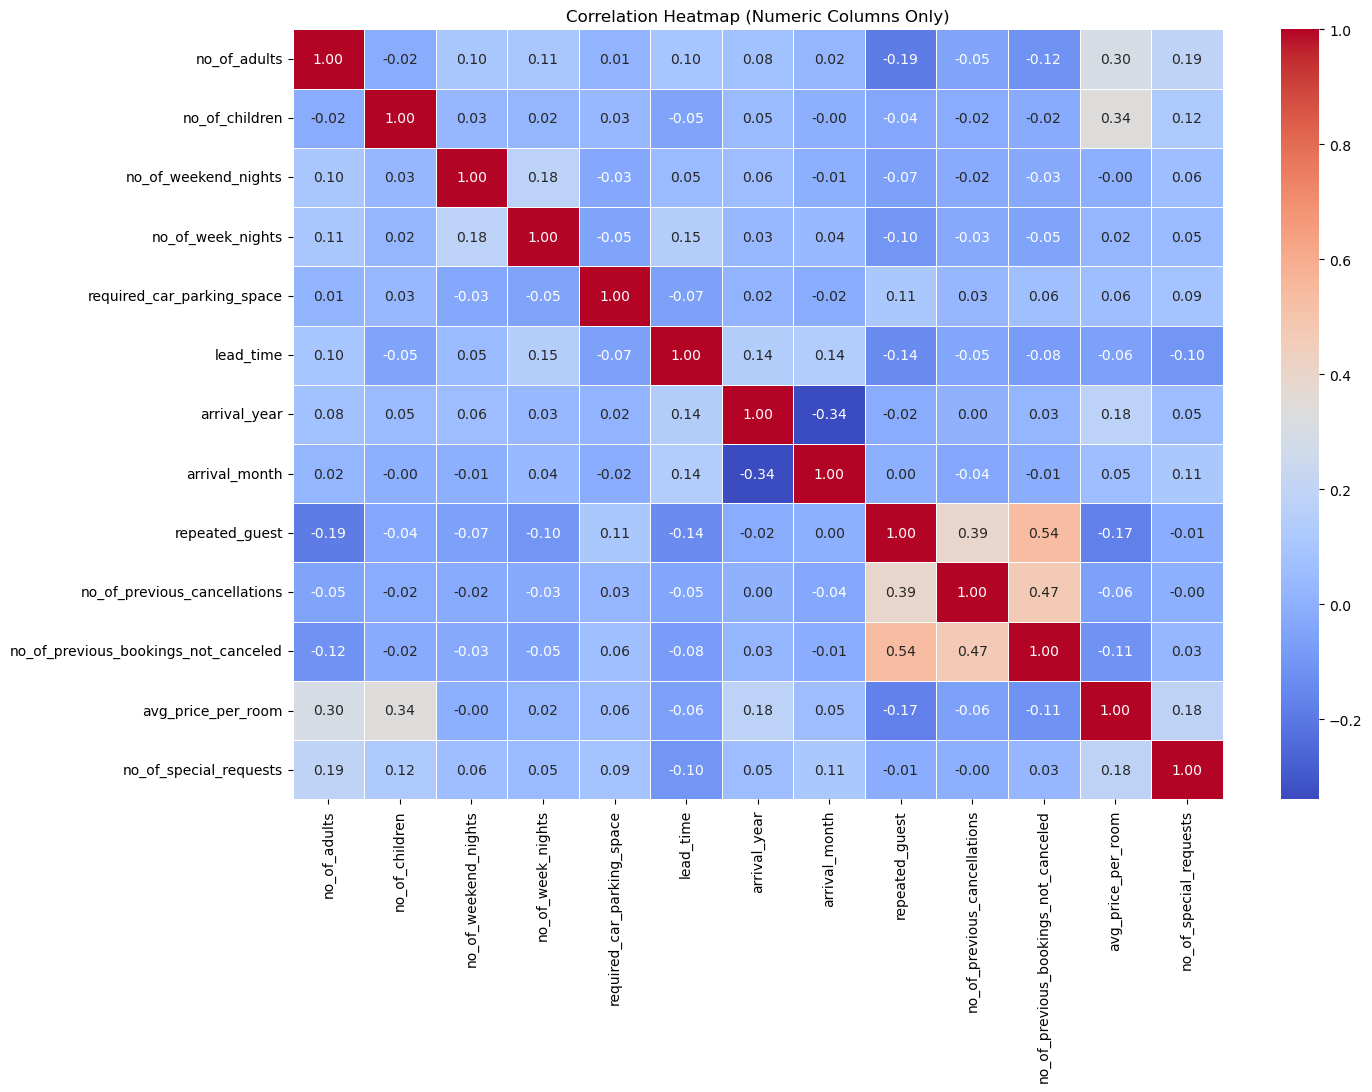

In [309]:
# केवल Numeric Columns से DataFrame बनाएं
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# अब Correlation निकालें
correlation_matrix = numeric_df.corr()

# Heatmap बनाएँ


plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


In [310]:
# Keep only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['int64', 'float64'])



In [311]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('booking_status', axis=1)
y = df['booking_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [313]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2017-10-02,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,2018-11-06,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,2018-02-28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,2018-05-20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,2018-04-11,Online,0,0,0,94.50,0,Canceled


In [314]:
print(X_train.select_dtypes(include='object').columns)


Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type'],
      dtype='object')


In [315]:
df.drop(columns=['Booking_ID'], inplace=True)  # Drop any ID or string fields


In [316]:
# Encode target column if not done
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['booking_status'] = le.fit_transform(df['booking_status'])

# One-Hot Encode remaining categorical columns
df = pd.get_dummies(df, drop_first=True)


In [317]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36238,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,2018-05-24 16:37:29.130746624,0.025637,0.023349,0.153411,103.423539,0.619655,0.672364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,2017-07-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,2018-02-28 00:00:00,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,2018-06-12 00:00:00,0.000000,0.000000,0.000000,99.450000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,2018-09-19 00:00:00,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,2018-12-31 00:00:00,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358


In [318]:
corr_data = df[['avg_price_per_room','no_of_special_requests','lead_time','no_of_adults','no_of_weekend_nights','no_of_weekend_nights','no_of_week_nights']]
corr_data.head()



,avg_price_per_room,no_of_special_requests,lead_time,no_of_adults,no_of_weekend_nights,no_of_weekend_nights,no_of_week_nights
0,65.00,0,224,2,1,1,2
1,106.68,1,5,2,2,2,3
2,60.00,0,1,1,2,2,1
3,100.00,0,211,2,0,0,2
4,94.50,0,48,2,1,1,1


In [319]:
 corr_data.corr()

,avg_price_per_room,no_of_special_requests,lead_time,no_of_adults,no_of_weekend_nights,no_of_weekend_nights,no_of_week_nights
avg_price_per_room,1.000000,0.184381,-0.062596,0.296886,-0.004525,-0.004525,0.022753
no_of_special_requests,0.184381,1.000000,-0.101645,0.189401,0.060593,0.060593,0.045994
lead_time,-0.062596,-0.101645,1.000000,0.097287,0.046595,0.046595,0.149650
no_of_adults,0.296886,0.189401,0.097287,1.000000,0.103316,0.103316,0.105622
no_of_weekend_nights,-0.004525,0.060593,0.046595,0.103316,1.000000,1.000000,0.179577
no_of_weekend_nights,-0.004525,0.060593,0.046595,0.103316,1.000000,1.000000,0.179577
no_of_week_nights,0.022753,0.045994,0.149650,0.105622,0.179577,0.179577,1.000000


<Axes: >

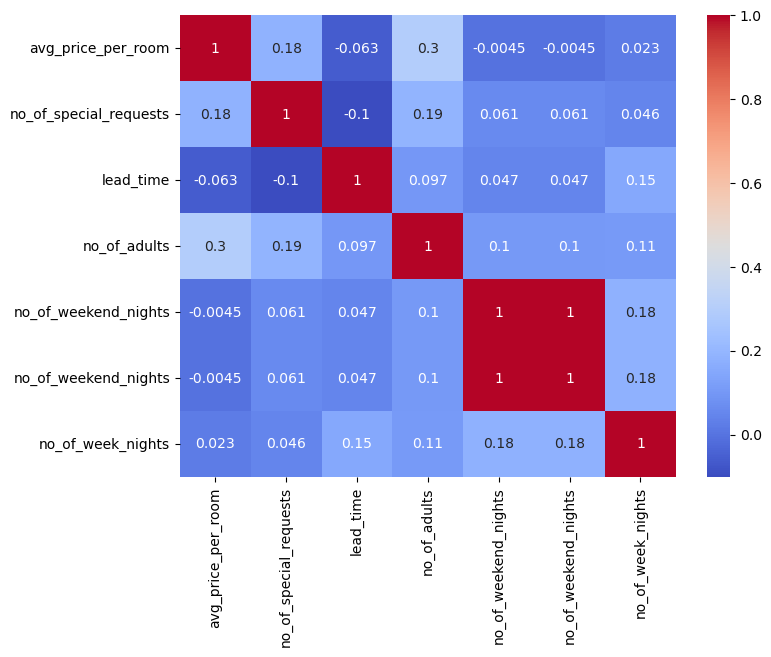

In [320]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm')

## Matplotlib Correlation Heatmap

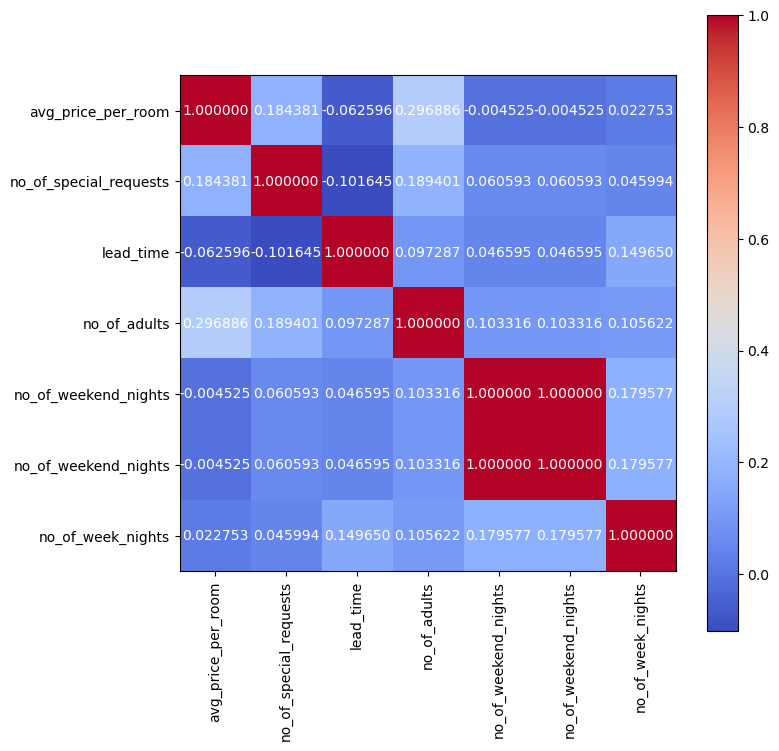

In [321]:
plt.imshow(corr_data.corr(),cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_data.columns)), corr_data.columns, rotation=90)
plt.yticks(range(len(corr_data.columns)), corr_data.columns)
plt.gcf().set_size_inches(8,8)

labels = corr_data.corr().values
for y in range(labels.shape[0]):
    for x in range (labels.shape[1]):
        plt.text(x, y, '{:2f}'.format(labels[y, x]), ha='center', va='center', color='white')

## Model Training (Baseline + Advanced Models)


In [322]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [323]:
def training_model(models, X_train, X_test, y_train, y_test):
    for modelparams in models:
        print('***************', modelparams['Name'], '***************')

        model = modelparams['model']
        model.fit(X_train, y_train)

        train_predict = model.predict(X_train)
        print('***************Training Accuracy***************')
        print(accuracy_score(y_train, train_predict))

        test_predict = model.predict(X_test)
        print('***************Testing Accuracy***************')
        print(accuracy_score(y_test, test_predict))

        print('***************Confusion Matrix***************')
        cn_matrix = confusion_matrix(y_test, test_predict)
        sns.heatmap(cn_matrix, annot=True)
        plt.show()

        print('***************Classification Report***************')
        print(classification_report(y_test, test_predict))
        print('---------------------------------------------------')
        print('===================================================')
        print()


In [324]:
models = [
    {'Name': 'LogisticRegression', 'model': LogisticRegression()},
    {'Name': 'RandomForestClassifier', 'model': RandomForestClassifier()},
    {'Name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier()}]


In [325]:
X_train = X_train.copy().apply(lambda col: col.view('int64') if np.issubdtype(col.dtype, np.datetime64) else col)
X_test  = X_test.copy().apply(lambda col: col.view('int64') if np.issubdtype(col.dtype, np.datetime64) else col)


*************** LogisticRegression ***************
***************Training Accuracy***************
0.6729841488628532
***************Testing Accuracy***************
0.6667126119917298
***************Confusion Matrix***************


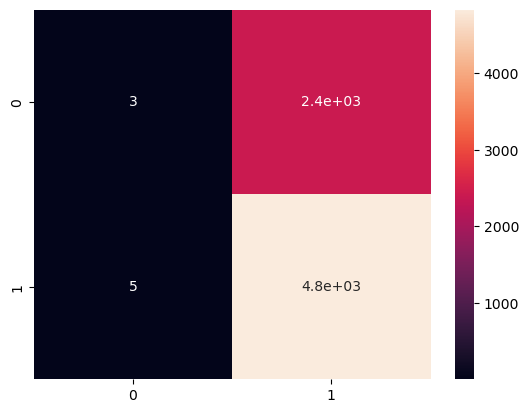

***************Classification Report***************
              precision    recall  f1-score   support

    Canceled       0.38      0.00      0.00      2416
Not_Canceled       0.67      1.00      0.80      4839

    accuracy                           0.67      7255
   macro avg       0.52      0.50      0.40      7255
weighted avg       0.57      0.67      0.53      7255

---------------------------------------------------

*************** RandomForestClassifier ***************
***************Training Accuracy***************
0.9940041350792557
***************Testing Accuracy***************
0.9040661612680909
***************Confusion Matrix***************


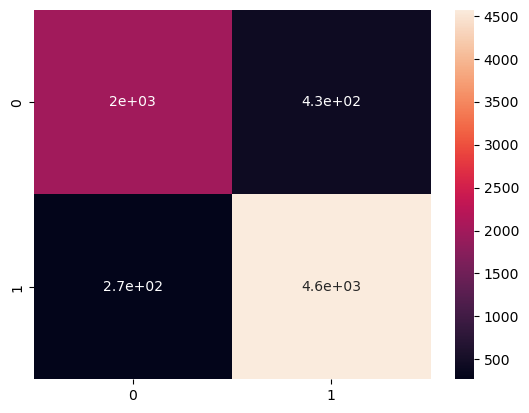

***************Classification Report***************
              precision    recall  f1-score   support

    Canceled       0.88      0.82      0.85      2416
Not_Canceled       0.91      0.94      0.93      4839

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255

---------------------------------------------------

*************** DecisionTreeClassifier ***************
***************Training Accuracy***************
0.9940041350792557
***************Testing Accuracy***************
0.8711233631977946
***************Confusion Matrix***************


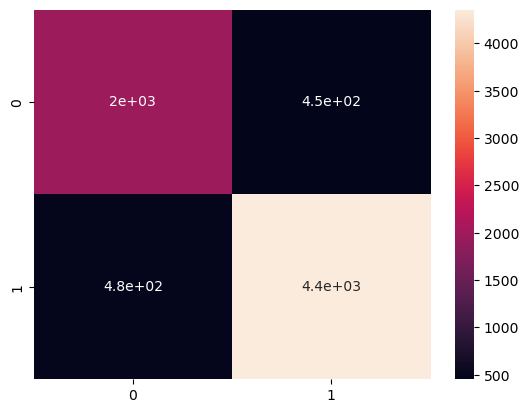

***************Classification Report***************
              precision    recall  f1-score   support

    Canceled       0.80      0.81      0.81      2416
Not_Canceled       0.91      0.90      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.85      0.86      0.86      7255
weighted avg       0.87      0.87      0.87      7255

---------------------------------------------------



In [349]:
training_model(models, X_train, X_test, y_train, y_test)

In [336]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert datetime columns to integers for model compatibility
X_train = X_train.copy().apply(lambda col: col.view('int64') if np.issubdtype(col.dtype, np.datetime64) else col)
X_test  = X_test.copy().apply(lambda col: col.view('int64') if np.issubdtype(col.dtype, np.datetime64) else col)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,    # number of trees
    max_depth=None,      # let trees grow fully
    random_state=42
)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

Random Forest Accuracy: 0.9037

Classification Report:
               precision    recall  f1-score   support

    Canceled       0.88      0.82      0.85      2416
Not_Canceled       0.91      0.95      0.93      4839

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255



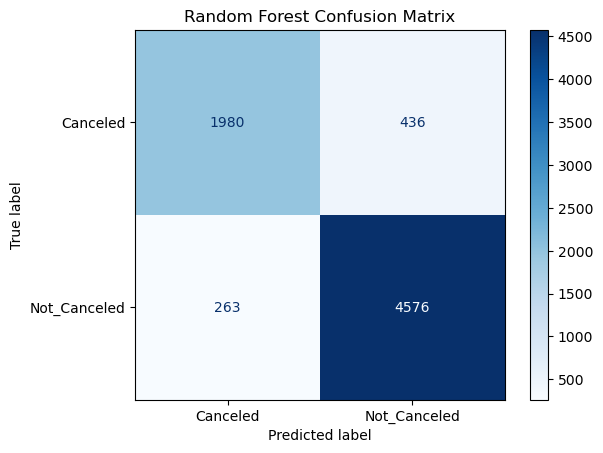

In [337]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()


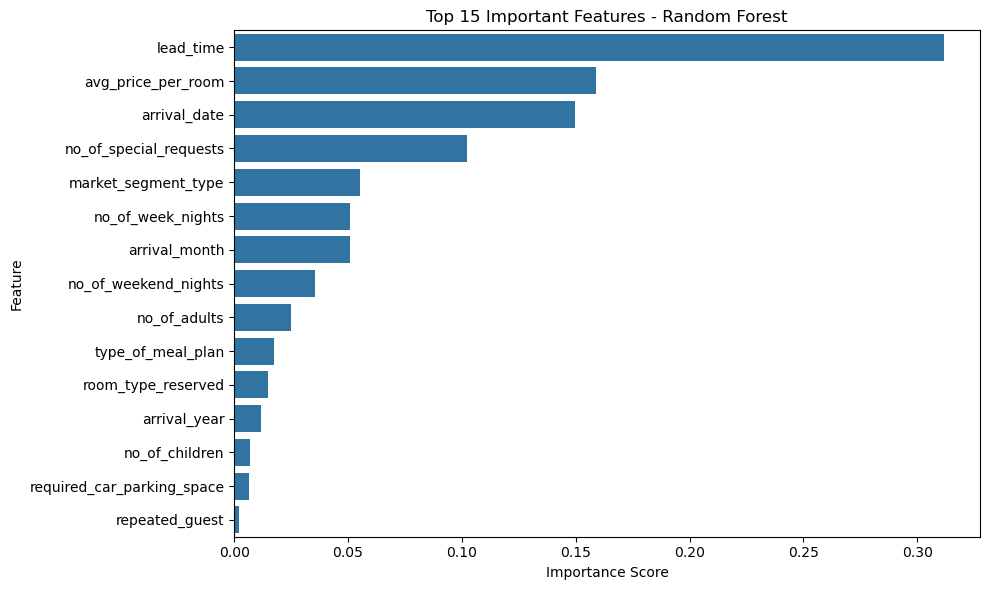

In [338]:
# Get feature importance
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:15], y=importances.index[:15])
plt.title("Top 15 Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [339]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert datetime columns to integers for model compatibility
X_train = X_train.copy().apply(lambda col: col.view('int64') if np.issubdtype(col.dtype, np.datetime64) else col)
X_test  = X_test.copy().apply(lambda col: col.view('int64') if np.issubdtype(col.dtype, np.datetime64) else col)

# Train Decision Tree
dt_model = DecisionTreeClassifier(
    criterion='gini',    # can use 'entropy'
    max_depth=None,      # unlimited depth
    random_state=42
)
dt_model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

Decision Tree Accuracy: 0.8713

Classification Report:
               precision    recall  f1-score   support

    Canceled       0.80      0.82      0.81      2416
Not_Canceled       0.91      0.90      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.85      0.86      0.86      7255
weighted avg       0.87      0.87      0.87      7255



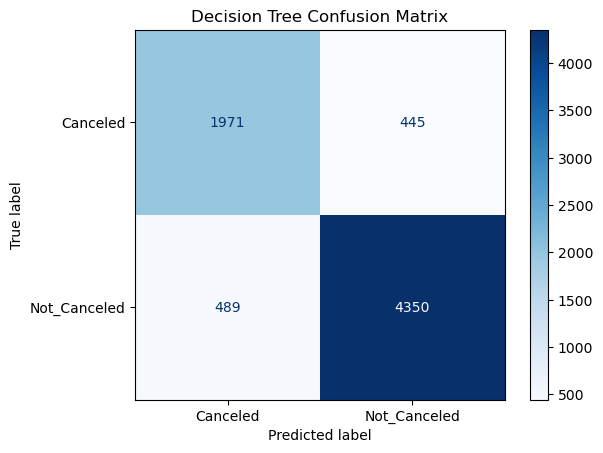

In [340]:
# Predictions
y_pred_dt = dt_model.predict(X_test)

# Accuracy
print("Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred_dt), 4))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()


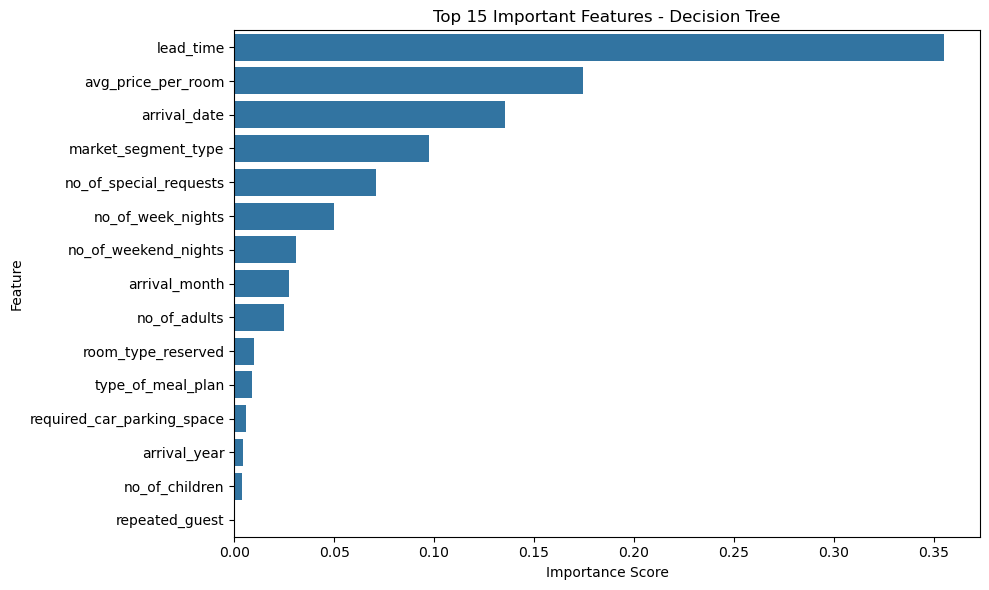

In [341]:
# Get feature importance
importances = pd.Series(dt_model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:15], y=importances.index[:15])
plt.title("Top 15 Important Features - Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [342]:
from sklearn.metrics import accuracy_score

# Example: for Decision Tree
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", round(accuracy_dt * 100, 2), "%")

# Example: for Random Forest
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", round(accuracy_rf * 100, 2), "%")


Decision Tree Accuracy: 87.13 %
Random Forest Accuracy: 90.37 %


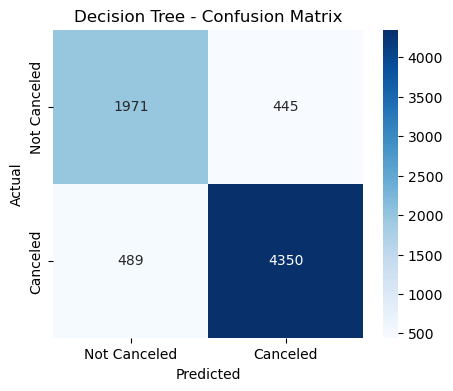

In [343]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example for Decision Tree
y_pred_dt = dt_model.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()


In [344]:
from sklearn.metrics import classification_report

print("Decision Tree - Classification Report:\n")
print(classification_report(y_test, y_pred_dt, target_names=['Not Canceled', 'Canceled']))


Decision Tree - Classification Report:

              precision    recall  f1-score   support

Not Canceled       0.80      0.82      0.81      2416
    Canceled       0.91      0.90      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.85      0.86      0.86      7255
weighted avg       0.87      0.87      0.87      7255



In [345]:
from sklearn.preprocessing import LabelEncoder

# Copy dataset to avoid overwriting original
df_encoded = df.copy()

# Select categorical columns
cat_cols = df_encoded.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print("✅ Label Encoding Done")
print(df_encoded.head())


✅ Label Encoding Done
   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

  arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 2  \
0   2017-10

In [346]:
# One-Hot Encode categorical columns
df_onehot = pd.get_dummies(df, drop_first=True)

print("✅ One-Hot Encoding Done")
print(df_onehot.head())


✅ One-Hot Encoding Done
   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

  arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 2  \
0   2017-

In [347]:
from sklearn.preprocessing import StandardScaler

# Select only numerical columns
num_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Scale numerical features
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print("✅ Scaling Done")
print(df_encoded.head())


✅ Scaling Done
   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0      0.298893        -0.26147              0.217401          -0.144803   
1      0.298893        -0.26147              1.365993           0.563972   
2     -1.628975        -0.26147              1.365993          -0.853578   
3      0.298893        -0.26147             -0.931190          -0.144803   
4      0.298893        -0.26147              0.217401          -0.853578   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                   -0.178819   1.614896     -2.137469       0.839242   
1                   -0.178819  -0.933701      0.467843       1.164990   
2                   -0.178819  -0.980250      0.467843      -1.766747   
3                   -0.178819   1.463610      0.467843      -0.789501   
4                   -0.178819  -0.433291      0.467843      -1.115250   

  arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 2  \
0   2017-10-02    